<a href="https://colab.research.google.com/github/PedroLucasRAS/projetos_cd/blob/main/Projeto_Ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas odfpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160671 sha256=9647181723e4311beef1ef537c5c6ab2a801726b42ad1c4bd79cfe2aeb82d2d6
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [1]:
import pandas as pd
import math  # Import necessário para a função ceil
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Carregar dados do arquivo Excel
data = pd.read_excel('Dados Recife.xlsx')

# Selecione as características e a variável alvo
X = data[['QTD. P13', 'QTD. P20', 'QTD. P45']]
y = data['TEMPO CARREGAMENTO']  # Certifique-se de que a coluna "TEMPO CARREGAMENTO" exista

# Preencher valores faltantes (NaN) com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Avalie o modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Função para receber entrada do usuário e fazer previsões
def prever_tempo_permanencia():
    print("Preencha os dados para a previsão:")

    qtd_p13 = float(input("Quantidade de vasilhames P 13: "))
    qtd_p45 = float(input("Quantidade de P 45: "))
    qtd_p20 = float(input("Quantidade de P 20: "))

    # Crie um DataFrame com os dados do usuário (use os mesmos nomes de coluna que foram usados no treino)
    novos_dados = pd.DataFrame({
        'QTD. P13': [qtd_p13],
        'QTD. P20': [qtd_p20],
        'QTD. P45': [qtd_p45]
    })

    # Preencher valores NaN se houverem (caso o usuário não insira algo)
    novos_dados = imputer.transform(novos_dados)

    # Faça a previsão
    previsao = model.predict(novos_dados)

  # Multiplique o resultado da previsão por 1440 e arredonde para cima
    previsao_multiplicada = math.ceil(previsao[0] * 1440)
    print(f'Tempo de Permanência Previsto (em minutos): {previsao_multiplicada}')


# Chame a função para receber dados do usuário
prever_tempo_permanencia()


FileNotFoundError: [Errno 2] No such file or directory: 'Dados Recife.xlsx'

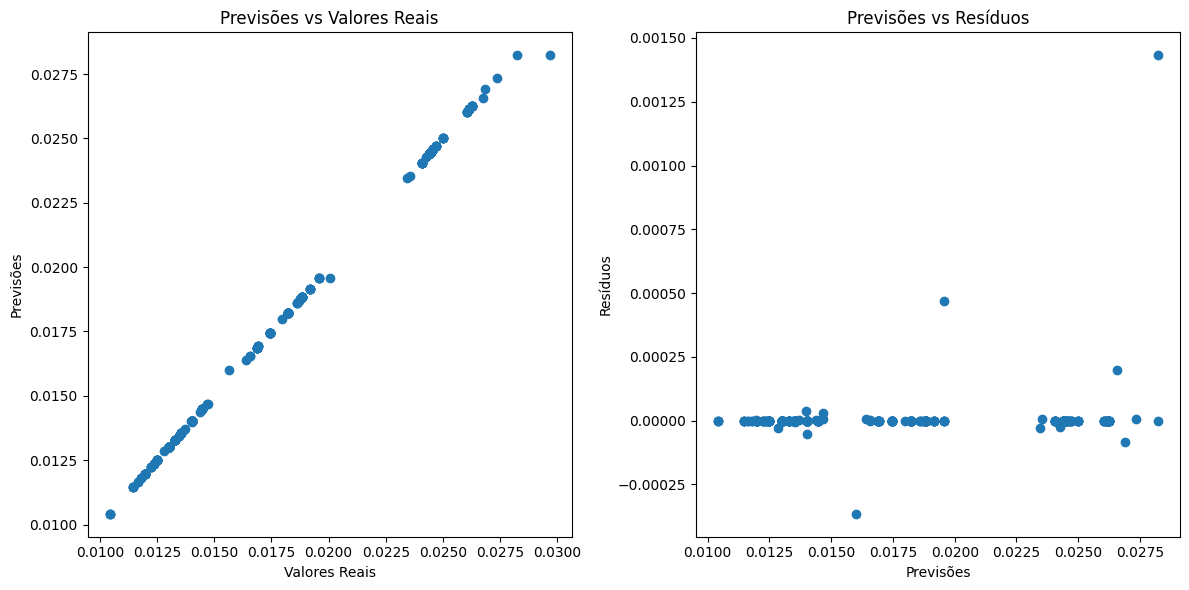

In [ ]:
import matplotlib.pyplot as plt

# Plotar previsões vs valores reais
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs Valores Reais')

# Plotar resíduos
residuos = y_test - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Previsões vs Resíduos')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import math

# Carregar dados do arquivo Excel
data = pd.read_excel('Dados Recife.xlsx')

# Selecione as características e a variável alvo
X = data[['QTD. P13', 'QTD. P20', 'QTD. P45']]
y = data['TEMPO CARREGAMENTO']

# Preencher valores faltantes (NaN) com a média
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Agora, vamos ler os dados de outra planilha para fazer as previsões
novos_dados = pd.read_excel('Agendamento.xlsx')

# Preencher valores vazios com zero
novos_dados[['QTD. P13', 'QTD. P20', 'QTD. P45']] = novos_dados[['QTD. P13', 'QTD. P20', 'QTD. P45']].fillna(0)

# Faça a previsão para cada linha e crie uma nova coluna com os resultados
novos_dados['TEMPO PERMANÊNCIA PREVISTO (minutos)'] = [
    math.ceil(model.predict([[row['QTD. P13'], row['QTD. P20'], row['QTD. P45']]])[0] * 1440)
    for _, row in novos_dados.iterrows()
]

# Salve os resultados em uma nova planilha
novos_dados.to_excel('Agendamento com Previsão.xlsx', index=False)

print("Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'")


Previsões concluídas e salvas em 'Agendamento com Previsão.xlsx'
